### Libraries




###### The OS module in Python provides a way of using operating system dependent functionality.



In [57]:
import os 

  ##### used for reading and analysing the data
  

In [58]:
import pandas as pd

##### used for computation on arrays

In [59]:
import numpy as np 

##### for random sample generation

In [60]:
import random 

#####  ensemble methods  combines the predictions of several base estimators built with a given learning algorithm :  random forest for classification




In [61]:
from sklearn.ensemble import RandomForestClassifier

##### using naive bayes for feature selection
library for naive bayes


In [62]:
from sklearn.naive_bayes import GaussianNB

##### Library for plotting the results

In [63]:
import matplotlib.pyplot as plt  

#### Reading data
Link for the data used here:http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2014.zip



In [64]:
# If the data is in same directory you can use this 
df=pd.read_csv('DfTRoadSafety_Accidents_2014-0.csv')
# else give the complete path of data
#os.chdir(r'directory:\folder name\file name') (path of the data file)

#df

###  Feature Selection

Here we are selecting the features(columns in dataset) of the data for further analysis, You can choose some other features also and see the results


In [65]:
Features=df[['Number_of_Vehicles','Day_of_Week','Junction_Detail',
    'Speed_limit','Weather_Conditions','Road_Type','Light_Conditions',
                  'Junction_Control','Urban_or_Rural_Area']]
#myx=['Number_of_Vehicles','Day_of_Week','Junction_Detail',
 #   'Speed_limit','Weather_Conditions','Road_Type','Light_Conditions',
  #                'Junction_Control','Urban_or_Rural_Area']
#myy=['Accident_Severity']

### Defining Severity
Defining Severity Function for predictions

In [66]:
# defining severity by taking values  
Severity=df[['Accident_Severity']]
ind=Severity==3 # maximum severity index defined in data set
Label=[] # label array for differntiating between severity values for analysis
for i in np.array(ind):
    if i==True:
        Label.append(1)#appending label with true(1) value if severity is 3
    else:
        Label.append(0) # else appending label with  false(0)
        
        

In [67]:
Label=np.array(Label)
#print(Label)
#print(ind)

### Training-80% data 
### Testing -20% data
Here 80% of data have been used for training and 20 % for testing.

In [68]:

# calculating length of features  which will be used for calculating 
# training and test features
numFeatures=len(Features)  


#### Calculating Training Data


In [69]:
numTrainFeatures=np.floor(0.8*numFeatures) # calculating training data

#### Calculating Testing Data


In [70]:
numTestFeatures=numFeatures-numTrainFeatures # calculating test data

In [71]:
ind=random.sample(range(numFeatures),(numFeatures)) 

In [72]:
# creating train indices 
trainIndices=ind[1:int(numTrainFeatures)] 
testIndices=ind[int(numTrainFeatures+1):]
trainFeatures=Features.loc[trainIndices,:]
trainLabels=Label[trainIndices[:]];
testFeatures=Features.loc[testIndices,:]
testLabels=Label[testIndices[:]]



### Random Forest classifier

In [108]:
# random forest classifier,
#The number of trees in the forest.

rf = RandomForestClassifier(n_estimators=100) # initialize
rf.fit(trainFeatures,trainLabels) # fit the data to the algorithm
results = rf.predict(trainFeatures)
ind=(results==trainLabels);
ind=list(ind);
trainAcc_tree=float(ind.count(True))/float(len(trainLabels));
print('\033[1m'+'Training Accuracy using RandomForest is:',trainAcc_tree*100);
results = rf.predict(testFeatures)
ind=(results==testLabels);
ind=list(ind);
testAcc_tree=float(ind.count(True))/float(len(testLabels));
print ('Testing Accuracy Using RandomForest is:',testAcc_tree*100);
test1=testAcc_tree*100


Training Accuracy using RandomForest is: 86.08358392564243
Testing Accuracy Using RandomForest is: 83.82996172772008


In [109]:
gnb = GaussianNB()
results= gnb.fit(trainFeatures,trainLabels)
ind=(results==trainLabels);
ind=list(ind);
#trainAcc_tree=float(ind.count(True))/float(len(trainLabels));
results= gnb.fit(trainFeatures,trainLabels).predict(testFeatures)
ind=(results==testLabels);
ind=list(ind);
testAcc_tree=float(ind.count(True))/float(len(testLabels));
test2=testAcc_tree*100
print ('Testing Accuracy Using naive_bayes is:',testAcc_tree*100);




Testing Accuracy Using naive_bayes is: 82.8970749043193


In [76]:
def proportion(total_range,attri_range):
    return float(attri_range)/float(total_range)*100


#### Data analysis
### Analysis 1
Accients prediction in residential area at speed 30 km/h



In [77]:
#Data Analysis
analysis1=len(df.loc[df.Speed_limit==30,:])


In [78]:
#analysis11=len(df.loc[((df.Speed_limit==30) & (df.Accident_Severity==1)) ,:])
print ('% of accidents in residential area at 30km/hr:',np.round(proportion(len(df),analysis1),2)
)
print ('Conclusion1:Most of the accident dont happens on highways as people thinks!!!!!')
#print  'proportion2',proportion(analysis1,analysis11)


% of accidents in residential area at 30km/hr: 64.92
Conclusion1:Most of the accident dont happens on highways as people thinks!!!!!


### Analysis 2
Accidents prediction in Urban area


In [79]:
analysis2=len(df.loc[df.Urban_or_Rural_Area==1,:])
ana2=proportion(len(df),analysis2)
print ('% of all the accidents happens in Urban areas is ',np.round(ana2,2))


% of all the accidents happens in Urban areas is  65.8


### Analysis 3
Accidents prediction in uncrontrolled junction




In [80]:
analysis3=len(df.loc[df.Junction_Control==4,:])
ana3=proportion(len(df),analysis3)
print ('% of accidents in uncontrolled junction:',np.round(ana3,2))


% of accidents in uncontrolled junction: 50.4


### Analysis 4
Accident prediction when weather is fine



In [81]:
analysis4=len(df.loc[df.Weather_Conditions==1,:]);
ana4=proportion(len(df),analysis4)
print( '% of accidents when weather is fine is:',np.round(ana4,2))
print ('Conclusion:People would think that most of accident take place in bad weather')



% of accidents when weather is fine is: 81.24
Conclusion:People would think that most of accident take place in bad weather


### Analysis 5
Accidents in daylight

In [82]:
analysis5=len(df.loc[df.Light_Conditions==1,:])
ana5=proportion(len(df),analysis5)
print ('% of accidents happend in daylight',np.round(ana5,2))

% of accidents happend in daylight 73.86


### Accidents on Sundays

In [83]:
#Analysis Number 7
acc_sunday=(float(len(df.loc[df.Day_of_Week==1,:]))/len(df))*100
#print 'acc_sunday',acc_sunday
print ('% of Accidents happening on sundays',acc_sunday);

% of Accidents happening on sundays 10.89378220636678


### Accidents happening on mondays

In [84]:
acc_monday=float(len(df.loc[df.Day_of_Week==2,:]))/len(df)*100
#print 'acc_monday',acc_monday
print ('% of Accidents happening on mondays',acc_sunday);

% of Accidents happening on mondays 10.89378220636678




### Accidents on tuesdays


In [85]:
acc_tuesday=(float(len(df.loc[df.Day_of_Week==3,:]))/len(df))*100
#print ('acc_tuesday',acc_tuesday)
print ('% of Accidents happening on tuesdays',acc_tuesday);

% of Accidents happening on tuesdays 15.252661937371004


### Accidents on wednesdays

In [86]:
acc_wednesday=(float(len(df.loc[df.Day_of_Week==4,:]))/len(df))*100
print ('% of Accidents happening on wednesdays',acc_wednesday);
#print 'acc_wednesday',acc_wednesday

% of Accidents happening on wednesdays 15.17885212066538


### Accidents on thursdays


In [87]:
acc_thursday=(float(len(df.loc[df.Day_of_Week==5,:]))/len(df))*100
#print 'acc_thursday',acc_thursday
print ('% of Accidents happening on thursdays',acc_thursday);



% of Accidents happening on thursdays 14.884979702300406


### Accidents on fridays

In [88]:
acc_friday=(float(len(df.loc[df.Day_of_Week==6,:]))/len(df))*100
#print 'acc_friday',acc_friday
print ('% of Accidents happening on fridays',acc_friday);


% of Accidents happening on fridays 16.374844520987956


### Accidents on saturdays

In [89]:
acc_saturday=(float(len(df.loc[df.Day_of_Week==7,:]))/len(df))*100
#print 'acc_saturday',acc_saturday
print ('% of Accidents happening on saturdays',acc_saturday);

% of Accidents happening on saturdays 12.99941225516327


In [90]:
labels=['sunday','monday','Tuesday','wednesday','Thursday','Friday','Saturday']
data=[acc_sunday,acc_monday,acc_tuesday,acc_wednesday,acc_thursday,acc_friday,acc_saturday];
explode=(0.0,0.0,0.0,0.0,0.0,0.1,0.0)

### Plotting all days accidents


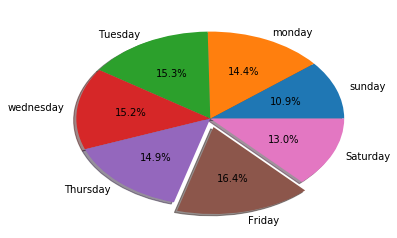

In [91]:
plt.pie(data,explode=explode,labels=labels,shadow=True, autopct='%1.1f%%')
plt.show()

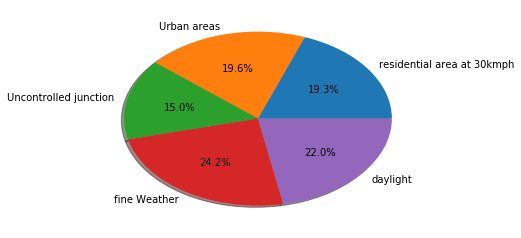

In [121]:
labels=['residential area at 30kmph','Urban areas','Uncontrolled junction','fine Weather','daylight']
data=[analysis1,analysis2,analysis3,analysis4,analysis5]
explode=(0.0,0.0,0.0,0.0,0.0)

plt.pie(data,explode=explode,labels=labels,shadow=True, autopct='%1.1f%%')
plt.show()